In [1]:
# Import libraries
import pandas as pd
#from chembl_webresource_client.new_client import new_client
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
from tqdm import tqdm
import statistics

***
### Graph of compounds / assays
***

In [2]:
def load_processed_data(filename):
    df_graph = pd.read_csv(filename)

    print('Imported data:')
    display(df_graph.head())
    print(f'Column names: {df_graph.columns}')
    print(f'Number of rows: {df_graph.shape[0]}')
    print(f'Number of columns: {df_graph.shape[1]}')

    return df_graph


In [3]:

df_graph = load_processed_data('AML_drugs_assay_target_disease_mapped_relationship_tidy_non_wide_used.csv')

Imported data:


,disease_focused,assay_importance,parent_compound_chembl_id,parent_compound_specificity,assay_chembl_id,assay_cluster,target_chembl_id,target_uniprot_ids,OT_uniprot_id,OT_symbol,OT_overall_score
0,AML,2,CHEMBL3137309,acceptable,CHEMBL4332203,986,CHEMBL4860,"['C9JHD5', 'P10415', 'P10416', 'Q13842', 'Q161...",P10415,['BCL2'],0.622360
1,AML,2,CHEMBL3137309,acceptable,CHEMBL4264659,985,CHEMBL4860,"['C9JHD5', 'P10415', 'P10416', 'Q13842', 'Q161...",P10415,['BCL2'],0.622360
2,AML,2,CHEMBL576982,specific,CHEMBL4836766,981,CHEMBL1974,"['A0AVG9', 'B7ZLT7', 'B7ZLT8', 'F5H0A0', 'P368...",P36888,['FLT3'],0.821082
3,AML,2,CHEMBL576982,specific,CHEMBL4385972,980,CHEMBL1974,"['A0AVG9', 'B7ZLT7', 'B7ZLT8', 'F5H0A0', 'P368...",P36888,['FLT3'],0.821082
4,AML,2,CHEMBL3301622,specific,CHEMBL4815226,979,CHEMBL1974,"['A0AVG9', 'B7ZLT7', 'B7ZLT8', 'F5H0A0', 'P368...",P36888,['FLT3'],0.821082


Column names: Index(['disease_focused', 'assay_importance', 'parent_compound_chembl_id',
       'parent_compound_specificity', 'assay_chembl_id', 'assay_cluster',
       'target_chembl_id', 'target_uniprot_ids', 'OT_uniprot_id', 'OT_symbol',
       'OT_overall_score'],
      dtype='object')
Number of rows: 11415
Number of columns: 11


In [4]:
import networkx as nx
from tqdm import tqdm

def build_graph(df):
    # Initialize a directed graph
    G = nx.Graph()

    # Add nodes and edges from the dataframe
    for _, row in tqdm(df.iterrows()):
        # Nodes
        G.add_node(row['disease_focused'], node_type='disease')
        G.add_node(row['OT_uniprot_id'], node_type='target', ot_id=row['OT_symbol'], 
                   chembl_id=row['target_chembl_id'], uniprot_ids=row['target_uniprot_ids'])
        G.add_node(row['parent_compound_chembl_id'], node_type='drug', specificity=row['parent_compound_specificity'])
        G.add_node(row['assay_cluster'], node_type='assay_cluster')
        G.add_node(row['assay_chembl_id'], node_type='assay', importance=row['assay_importance'])

        # Edges
        G.add_edge(row['disease_focused'], row['OT_uniprot_id'], weight=row['OT_overall_score']) # Disease - Target, OT score as weight
        G.add_edge(row['OT_uniprot_id'], row['parent_compound_chembl_id']) # Target - Drug, based on whether the drug targets that protein 
        G.add_edge(row['parent_compound_chembl_id'], row['assay_cluster']) # Drug - Assay cluster, based on the assays the drug has been tested in
        G.add_edge(row['assay_cluster'], row['assay_chembl_id']) # Assay cluster - Assay, based on the individual assays in each cluster

    # Print some basic information about the graph
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Number of disease nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'disease'])}")
    print(f"Number of target nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'target'])}")
    print(f"Number of drug nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'drug'])}")
    print(f"Number of assay_cluster nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'assay_cluster'])}")
    print(f"Number of assay nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'assay'])}")
    print(f"Average degree: {float(G.order())/ G.size()}")
    print(f"Number of connected components: {nx.number_connected_components(G)}")

    return G

In [5]:
G = build_graph(df_graph)

0it [00:00, ?it/s]

11415it [00:00, 12934.08it/s]

Number of nodes: 10175
Number of edges: 13701
Number of disease nodes: 1
Number of target nodes: 568
Number of drug nodes: 17
Number of assay_cluster nodes: 2037
Number of assay nodes: 7552
Average degree: 0.7426465221516677
Number of connected components: 1


Number of nodes: 10175
Number of edges: 13701


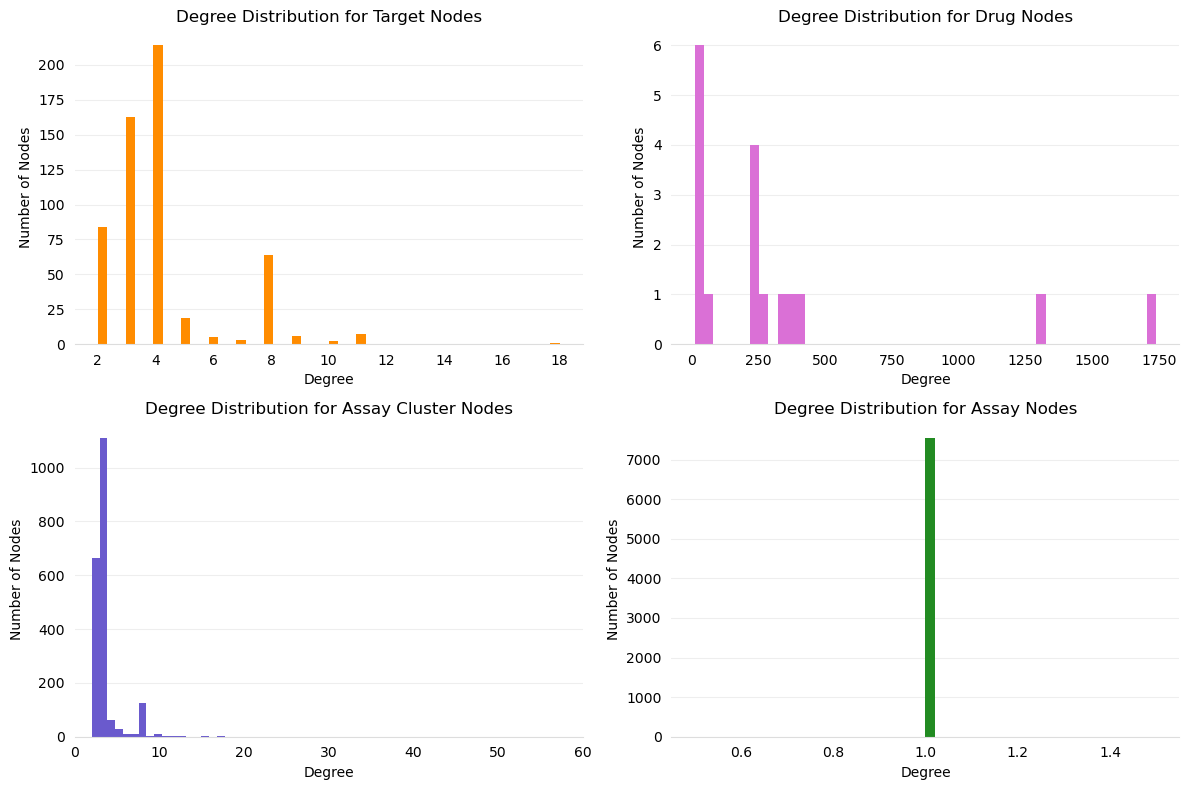

Number of connected components: 1
Number of nodes in the largest connected component: 10175
Number of edges in the largest connected component: 13701
Degree centrality for AML: 0.05582858266168666
Degree centrality for P10415: 0.00029486927462158444
Degree centrality for CHEMBL3137309: 0.004914487910359741
Degree centrality for 986: 0.00019657951641438963
Degree centrality for CHEMBL4332203: 9.828975820719482e-05
Degree centrality for 985: 0.00019657951641438963
Degree centrality for CHEMBL4264659: 9.828975820719482e-05
Degree centrality for P36888: 0.00039315903282877927
Degree centrality for CHEMBL576982: 0.1285630037350108
Degree centrality for 981: 0.00019657951641438963


In [6]:
# Basic Analysis
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Degree Distribution
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Target nodes
target_degrees = [G.degree(n) for n in G.nodes() if G.nodes[n]['node_type'] == 'target']
axs[0, 0].hist(target_degrees, bins=50, color='darkorange')
axs[0, 0].set_title('Degree Distribution for Target Nodes')
axs[0, 0].set_xlabel('Degree')
axs[0, 0].set_ylabel('Number of Nodes')
# Axis formatting.
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['left'].set_visible(False)
axs[0,0].spines['bottom'].set_color('#DDDDDD')
axs[0,0].tick_params(bottom=False, left=False)
axs[0,0].set_axisbelow(True)
axs[0,0].yaxis.grid(True, color='#EEEEEE')
axs[0,0].xaxis.grid(False)


# Drug nodes
drug_degrees = [G.degree(n) for n in G.nodes() if G.nodes[n]['node_type'] == 'drug']
axs[0, 1].hist(drug_degrees, bins=50, color='orchid')
axs[0, 1].set_title('Degree Distribution for Drug Nodes')
axs[0, 1].set_xlabel('Degree')
axs[0, 1].set_ylabel('Number of Nodes')
# Axis formatting.
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['left'].set_visible(False)
axs[0,1].spines['bottom'].set_color('#DDDDDD')
axs[0,1].tick_params(bottom=False, left=False)
axs[0,1].set_axisbelow(True)
axs[0,1].yaxis.grid(True, color='#EEEEEE')
axs[0,1].xaxis.grid(False)


# Assay cluster nodes
assay_cluster_degrees = [G.degree(n) for n in G.nodes() if G.nodes[n]['node_type'] == 'assay_cluster']
axs[1, 0].hist(assay_cluster_degrees, bins=5000, color='slateblue')
axs[1, 0].set_title('Degree Distribution for Assay Cluster Nodes')
axs[1, 0].set_xlabel('Degree')
axs[1, 0].set_ylabel('Number of Nodes')
axs[1, 0].set_xlim(0, 60)
# Axis formatting.
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['left'].set_visible(False)
axs[1,0].spines['bottom'].set_color('#DDDDDD')
axs[1,0].tick_params(bottom=False, left=False)
axs[1,0].set_axisbelow(True)
axs[1,0].yaxis.grid(True, color='#EEEEEE')
axs[1,0].xaxis.grid(False)


# Assay nodes
assay_degrees = [G.degree(n) for n in G.nodes() if G.nodes[n]['node_type'] == 'assay']
axs[1, 1].hist(assay_degrees, bins=50,color='forestgreen')
axs[1, 1].set_title('Degree Distribution for Assay Nodes')
axs[1, 1].set_xlabel('Degree')
axs[1, 1].set_ylabel('Number of Nodes')
# Axis formatting.
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['left'].set_visible(False)
axs[1,1].spines['bottom'].set_color('#DDDDDD')
axs[1,1].tick_params(bottom=False, left=False)
axs[1,1].set_axisbelow(True)
axs[1,1].yaxis.grid(True, color='#EEEEEE')
axs[1,1].xaxis.grid(False)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Connected Components
num_connected_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_connected_components}")

# Largest Connected Component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)
print(f"Number of nodes in the largest connected component: {subgraph.number_of_nodes()}")
print(f"Number of edges in the largest connected component: {subgraph.number_of_edges()}")

# Centrality Measures
# Degree Centrality for a subset of nodes to limit output size
subset_of_nodes = list(G.nodes())[:10]  # First 10 nodes
degree_centrality = nx.degree_centrality(G)
for node in subset_of_nodes:
    print(f"Degree centrality for {node}: {degree_centrality[node]}")

In [7]:
G.nodes(data=True)

NodeDataView({'AML': {'node_type': 'disease'}, 'P10415': {'node_type': 'target', 'ot_id': "['BCL2']", 'chembl_id': 'CHEMBL4860', 'uniprot_ids': "['C9JHD5', 'P10415', 'P10416', 'Q13842', 'Q16197']"}, 'CHEMBL3137309': {'node_type': 'drug', 'specificity': 'acceptable'}, '986': {'node_type': 'assay_cluster'}, 'CHEMBL4332203': {'node_type': 'assay', 'importance': 2}, '985': {'node_type': 'assay_cluster'}, 'CHEMBL4264659': {'node_type': 'assay', 'importance': 2}, 'P36888': {'node_type': 'target', 'ot_id': "['FLT3']", 'chembl_id': 'CHEMBL1974', 'uniprot_ids': "['A0AVG9', 'B7ZLT7', 'B7ZLT8', 'F5H0A0', 'P36888', 'Q13414']"}, 'CHEMBL576982': {'node_type': 'drug', 'specificity': 'specific'}, '981': {'node_type': 'assay_cluster'}, 'CHEMBL4836766': {'node_type': 'assay', 'importance': 2}, '980': {'node_type': 'assay_cluster'}, 'CHEMBL4385972': {'node_type': 'assay', 'importance': 2}, 'CHEMBL3301622': {'node_type': 'drug', 'specificity': 'specific'}, '979': {'node_type': 'assay_cluster'}, 'CHEMBL481

  0%|          | 0/10175 [00:00<?, ?it/s]

100%|██████████| 10175/10175 [00:00<00:00, 1346788.79it/s]

1 568 17 2037 7552


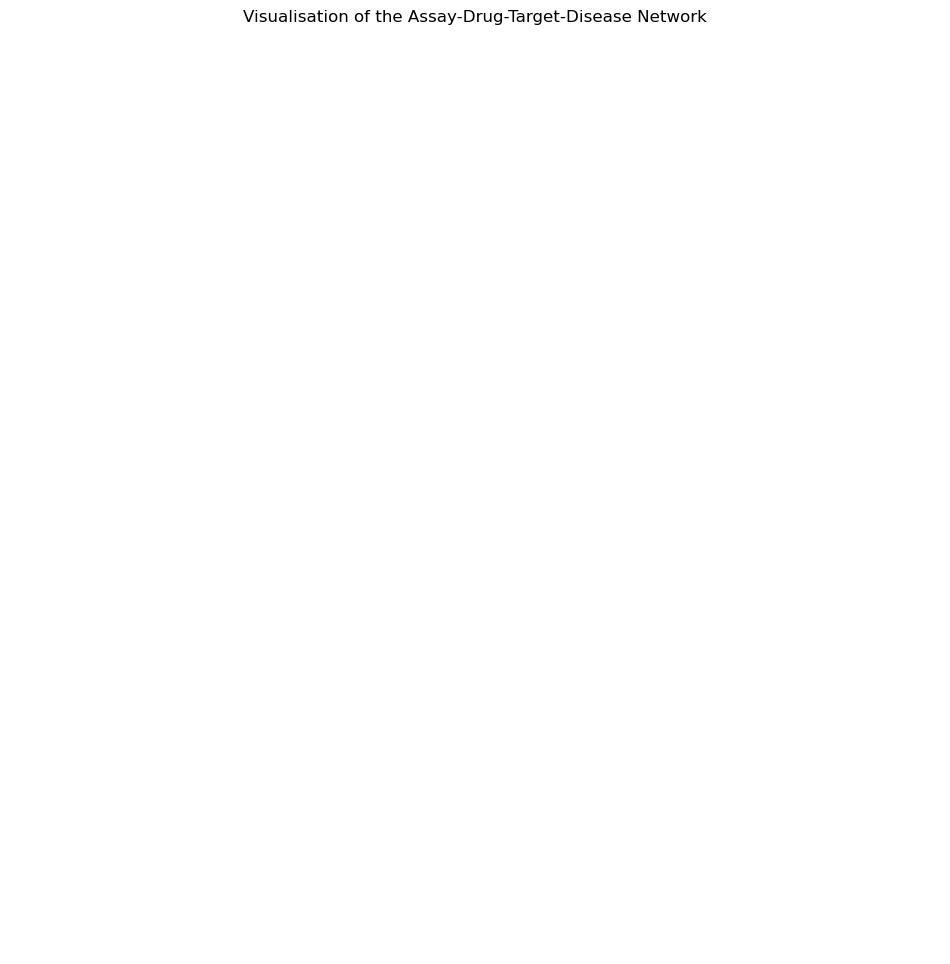

In [8]:
def visualise_graph(G):
    # Create a color map based on node types
    node_colors = []
    for _, data in tqdm(G.nodes(data=True)):
        if data['node_type'] == 'disease':
            node_colors.append('red')  # Color for disease
        elif data['node_type'] == 'target':
            node_colors.append('gold')  # Color for targets
        elif data['node_type'] == 'drug':
            node_colors.append('darkgreen')  # Color for targets
        elif data['node_type'] == 'assay_cluster':
            node_colors.append('blue')  # Color for assays
        elif data['node_type'] == 'assay':
            node_colors.append('lightblue')  # Color for phases

    print(node_colors.count('red'), node_colors.count('gold'), node_colors.count('darkgreen'), node_colors.count('blue'), node_colors.count('lightblue'))
    # Draw the network
    pos = nx.spring_layout(G, seed=42)  # For consistent layout
    plt.figure(figsize=(12, 12))
    nx.draw_networkx(G, pos, with_labels=False, node_size=20, alpha=0.5,
                    node_color=node_colors)  # Use the color map
    plt.title("Visualisation of the Assay-Drug-Target-Disease Network")
    plt.axis('off')  # Hide axes
    plt.show()

visualise_graph(G)

In [9]:
deg_centrality = nx.degree_centrality(G) 
print(deg_centrality) 
close_centrality = nx.closeness_centrality(G) 
print(close_centrality)
bet_centrality = nx.betweenness_centrality(G)
print(bet_centrality)

{'AML': 0.05582858266168666, 'P10415': 0.00029486927462158444, 'CHEMBL3137309': 0.004914487910359741, '986': 0.00019657951641438963, 'CHEMBL4332203': 9.828975820719482e-05, '985': 0.00019657951641438963, 'CHEMBL4264659': 9.828975820719482e-05, 'P36888': 0.00039315903282877927, 'CHEMBL576982': 0.1285630037350108, '981': 0.00019657951641438963, 'CHEMBL4836766': 9.828975820719482e-05, '980': 0.00019657951641438963, 'CHEMBL4385972': 9.828975820719482e-05, 'CHEMBL3301622': 0.024572439551798705, '979': 0.00029486927462158444, 'CHEMBL4815226': 9.828975820719482e-05, 'CHEMBL4815227': 9.828975820719482e-05, '978': 0.00039315903282877927, 'CHEMBL4315096': 9.828975820719482e-05, 'CHEMBL4315097': 9.828975820719482e-05, 'CHEMBL4315098': 9.828975820719482e-05, '977': 0.00029486927462158444, 'CHEMBL4686308': 9.828975820719482e-05, 'CHEMBL4686309': 9.828975820719482e-05, '976': 0.00019657951641438963, 'CHEMBL5162924': 9.828975820719482e-05, '975': 0.00019657951641438963, 'CHEMBL5162923': 9.82897582071

In [10]:
def filter_and_rank_clusters(nodes, types, centrality):
    filtered_nodes = {node: centrality[node] for node in nodes if G.nodes[node]['node_type'] == 'assay_cluster'}
    ranked_nodes = sorted(filtered_nodes.items(), key=lambda item: item[1], reverse=True)
    return ranked_nodes

def filter_and_rank_assays(nodes, types, centrality):
    filtered_nodes = {node: centrality[node] for node in nodes if G.nodes[node]['node_type'] == 'assay'}
    ranked_nodes = sorted(filtered_nodes.items(), key=lambda item: item[1], reverse=True)
    return ranked_nodes

In [11]:
ranked_degree_cl = filter_and_rank_clusters(deg_centrality.keys(), G.nodes(data=True), degree_centrality)
ranked_closeness_cl = filter_and_rank_clusters(close_centrality.keys(), G.nodes(data=True), close_centrality)
ranked_betweenness_cl = filter_and_rank_clusters(bet_centrality.keys(), G.nodes(data=True), bet_centrality)

ranked_degree_as = filter_and_rank_assays(deg_centrality.keys(), G.nodes(data=True), degree_centrality)
ranked_closeness_as = filter_and_rank_assays(close_centrality.keys(), G.nodes(data=True), close_centrality)
ranked_betweenness_as = filter_and_rank_assays(bet_centrality.keys(), G.nodes(data=True), bet_centrality)

In [12]:
pd.DataFrame(ranked_degree_cl).to_csv('ranked_degree_v3.csv')
pd.DataFrame(ranked_closeness_cl).to_csv('ranked_closeness_v3.csv')
pd.DataFrame(ranked_betweenness_cl).to_csv('ranked_betweenness_v3.csv')

In [13]:
G_filt = G.copy()
G_filt.remove_node('Not AML cell lines')


Number of nodes: 10174
Number of edges: 9078


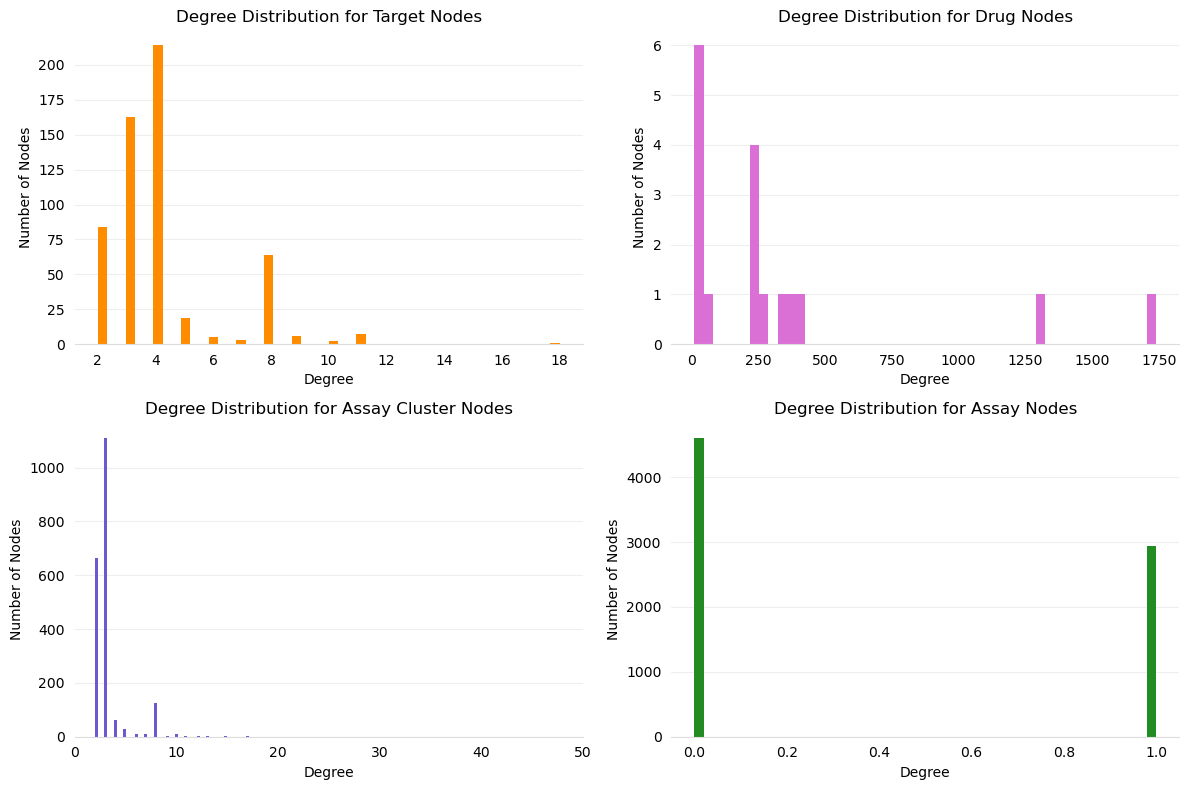

Number of connected components: 4607
Number of nodes in the largest connected component: 5568
Number of edges in the largest connected component: 9078
Degree centrality for AML: 0.05582858266168666
Degree centrality for P10415: 0.00029486927462158444
Degree centrality for CHEMBL3137309: 0.004914487910359741
Degree centrality for 986: 0.00019657951641438963
Degree centrality for CHEMBL4332203: 9.828975820719482e-05
Degree centrality for 985: 0.00019657951641438963
Degree centrality for CHEMBL4264659: 9.828975820719482e-05
Degree centrality for P36888: 0.00039315903282877927
Degree centrality for CHEMBL576982: 0.1285630037350108
Degree centrality for 981: 0.00019657951641438963


In [14]:
# Basic Analysis
print(f"Number of nodes: {G_filt.number_of_nodes()}")
print(f"Number of edges: {G_filt.number_of_edges()}")

# Degree Distribution
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Target nodes
target_degrees = [G_filt.degree(n) for n in G_filt.nodes() if G_filt.nodes[n]['node_type'] == 'target']
axs[0, 0].hist(target_degrees, bins=50, color='darkorange')
axs[0, 0].set_title('Degree Distribution for Target Nodes')
axs[0, 0].set_xlabel('Degree')
axs[0, 0].set_ylabel('Number of Nodes')
# Axis formatting.
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['left'].set_visible(False)
axs[0,0].spines['bottom'].set_color('#DDDDDD')
axs[0,0].tick_params(bottom=False, left=False)
axs[0,0].set_axisbelow(True)
axs[0,0].yaxis.grid(True, color='#EEEEEE')
axs[0,0].xaxis.grid(False)


# Drug nodes
drug_degrees = [G_filt.degree(n) for n in G_filt.nodes() if G_filt.nodes[n]['node_type'] == 'drug']
axs[0, 1].hist(drug_degrees, bins=50, color='orchid')
axs[0, 1].set_title('Degree Distribution for Drug Nodes')
axs[0, 1].set_xlabel('Degree')
axs[0, 1].set_ylabel('Number of Nodes')
# Axis formatting.
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['left'].set_visible(False)
axs[0,1].spines['bottom'].set_color('#DDDDDD')
axs[0,1].tick_params(bottom=False, left=False)
axs[0,1].set_axisbelow(True)
axs[0,1].yaxis.grid(True, color='#EEEEEE')
axs[0,1].xaxis.grid(False)


# Assay cluster nodes
assay_cluster_degrees = [G_filt.degree(n) for n in G_filt.nodes() if G_filt.nodes[n]['node_type'] == 'assay_cluster']
axs[1, 0].hist(assay_cluster_degrees, bins=1000, color='slateblue')
axs[1, 0].set_title('Degree Distribution for Assay Cluster Nodes')
axs[1, 0].set_xlabel('Degree')
axs[1, 0].set_ylabel('Number of Nodes')
axs[1, 0].set_xlim(0, 50)
# Axis formatting.
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['left'].set_visible(False)
axs[1,0].spines['bottom'].set_color('#DDDDDD')
axs[1,0].tick_params(bottom=False, left=False)
axs[1,0].set_axisbelow(True)
axs[1,0].yaxis.grid(True, color='#EEEEEE')
axs[1,0].xaxis.grid(False)


# Assay nodes
assay_degrees = [G_filt.degree(n) for n in G_filt.nodes() if G_filt.nodes[n]['node_type'] == 'assay']
axs[1, 1].hist(assay_degrees, bins=50, color='forestgreen')
axs[1, 1].set_title('Degree Distribution for Assay Nodes')
axs[1, 1].set_xlabel('Degree')
axs[1, 1].set_ylabel('Number of Nodes')
# Axis formatting.
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['left'].set_visible(False)
axs[1,1].spines['bottom'].set_color('#DDDDDD')
axs[1,1].tick_params(bottom=False, left=False)
axs[1,1].set_axisbelow(True)
axs[1,1].yaxis.grid(True, color='#EEEEEE')
axs[1,1].xaxis.grid(False)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Connected Components
num_connected_components = nx.number_connected_components(G_filt)
print(f"Number of connected components: {num_connected_components}")

# Largest Connected Component
largest_cc = max(nx.connected_components(G_filt), key=len)
subgraph = G.subgraph(largest_cc)
print(f"Number of nodes in the largest connected component: {subgraph.number_of_nodes()}")
print(f"Number of edges in the largest connected component: {subgraph.number_of_edges()}")

# Centrality Measures
# Degree Centrality for a subset of nodes to limit output size
subset_of_nodes = list(G_filt.nodes())[:10]  # First 10 nodes
degree_centrality = nx.degree_centrality(G)
for node in subset_of_nodes:
    print(f"Degree centrality for {node}: {degree_centrality[node]}")

In [15]:
# Largest Connected Component
largest_cc = max(nx.connected_components(G_filt), key=len)
subgraph = G_filt.subgraph(largest_cc)


In [16]:
deg_centrality_sg = nx.degree_centrality(subgraph) 
print(deg_centrality_sg) 
close_centrality_sg = nx.closeness_centrality(subgraph) 
print(close_centrality_sg)
bet_centrality_sg = nx.betweenness_centrality(subgraph)
print(bet_centrality_sg)

{'AML': 0.1020298185737381, 'P10415': 0.0005388898868331237, 'CHEMBL3137309': 0.008801868151607689, '986': 0.00035925992455541585, 'CHEMBL4332203': 0.00017962996227770793, '985': 0.00035925992455541585, 'CHEMBL4264659': 0.00017962996227770793, 'P36888': 0.0007185198491108317, 'CHEMBL576982': 0.23477636069696425, '981': 0.00035925992455541585, 'CHEMBL4836766': 0.00017962996227770793, '980': 0.00035925992455541585, 'CHEMBL4385972': 0.00017962996227770793, 'CHEMBL3301622': 0.044727860607149277, '979': 0.0005388898868331237, 'CHEMBL4815226': 0.00017962996227770793, 'CHEMBL4815227': 0.00017962996227770793, '978': 0.0007185198491108317, 'CHEMBL4315096': 0.00017962996227770793, 'CHEMBL4315097': 0.00017962996227770793, 'CHEMBL4315098': 0.00017962996227770793, '977': 0.0005388898868331237, 'CHEMBL4686308': 0.00017962996227770793, 'CHEMBL4686309': 0.00017962996227770793, '976': 0.00035925992455541585, 'CHEMBL5162924': 0.00017962996227770793, '975': 0.00035925992455541585, 'CHEMBL5162923': 0.0001

In [17]:
ranked_degree_sg = filter_and_rank_clusters(deg_centrality_sg.keys(), subgraph.nodes(data=True), deg_centrality_sg)
ranked_closeness_sg = filter_and_rank_clusters(close_centrality_sg.keys(), subgraph.nodes(data=True), close_centrality_sg)
ranked_betweenness_sg = filter_and_rank_clusters(bet_centrality_sg.keys(), subgraph.nodes(data=True), bet_centrality_sg)

pd.DataFrame(ranked_degree_sg).to_csv('ranked_degree_sg.csv')
pd.DataFrame(ranked_closeness_sg).to_csv('ranked_closeness_sg.csv')
pd.DataFrame(ranked_betweenness_sg).to_csv('ranked_betweenness_sg.csv')

In [18]:
nx.write_gexf(G, "all.gexf")
nx.write_gexf(subgraph, "no_not_AML.gexf")

In [19]:
def build_drug_specific_graph(df, drug_focus):

    # Filter the DataFrame for the specific drug
    df_filtered = df[df['parent_compound_chembl_id'] == drug_focus]
    
    # Initialize a graph
    G = nx.Graph()

    # Add nodes and edges from the dataframe
    for _, row in tqdm(df_filtered.iterrows()):
        # Nodes
        G.add_node(row['disease_focused'], node_type='disease')
        G.add_node(row['OT_uniprot_id'], node_type='target', ot_id=row['OT_symbol'], 
                   chembl_id=row['target_chembl_id'], uniprot_ids=row['target_uniprot_ids'])
        G.add_node(row['parent_compound_chembl_id'], node_type='drug', specificity=row['parent_compound_specificity'])
        G.add_node(row['assay_cluster'], node_type='assay_cluster')
        G.add_node(row['assay_chembl_id'], node_type='assay', importance=row['assay_importance'])

        # Edges
        G.add_edge(row['disease_focused'], row['OT_uniprot_id'], weight=row['OT_overall_score']) # Disease - Target, OT score as weight
        G.add_edge(row['OT_uniprot_id'], row['parent_compound_chembl_id']) # Target - Drug, based on whether the drug targets that protein 
        G.add_edge(row['parent_compound_chembl_id'], row['assay_cluster']) # Drug - Assay cluster, based on the assays the drug has been tested in
        G.add_edge(row['assay_cluster'], row['assay_chembl_id']) # Assay cluster - Assay, based on the individual assays in each cluster

    # Print some basic information about the graph
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Number of disease nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'disease'])}")
    print(f"Number of target nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'target'])}")
    print(f"Number of drug nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'drug'])}")
    print(f"Number of assay_cluster nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'assay_cluster'])}")
    print(f"Number of assay nodes: {len([n for n in G.nodes(data=True) if n[1]['node_type'] == 'assay'])}")
    print(f"Average degree: {float(G.order())/ G.size()}")
    print(f"Number of connected components: {nx.number_connected_components(G)}")

    return G


In [20]:
drug_focus = 'CHEMBL1489'
df_filtered = df_graph[df_graph['parent_compound_chembl_id'] == drug_focus]

G_CHEMBL1489 = build_drug_specific_graph(df_graph, drug_focus)

481it [00:00, 9626.53it/s]

Number of nodes: 729
Number of edges: 840
Number of disease nodes: 1
Number of target nodes: 113
Number of drug nodes: 1
Number of assay_cluster nodes: 133
Number of assay nodes: 481
Average degree: 0.8678571428571429
Number of connected components: 1


In [21]:
def visualise_drug_graph(graph):

    # Create a color map based on node types
    node_colors = []
    for _, data in graph.nodes(data=True):
        if data['node_type'] == 'drug':
            node_colors.append('pink')  # Color for compounds
        elif data['node_type'] == 'assay':
            node_colors.append('darkgreen')  # Color for assays
        elif data['node_type'] == 'disease':
            node_colors.append('red')  # Color for disease
        elif data['node_type'] == 'assay_cluster':
            node_colors.append('lightblue')  # Color for assay cluster
        elif data['node_type'] == 'target':
            node_colors.append('orange')  # Color for assay cluster

    # Draw the network
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 12))
    try:
        nx.draw_networkx(graph, pos, with_labels=False, node_size=20, alpha=0.5,
                    node_color=node_colors)  # Use the color map
    except KeyError as e:
        missing_node = str(e).strip("'")
        print(f"Missing position for node: {missing_node}")
        
    plt.title("Graph for Drug G_CHEMBL1489: Disease - Target - Drug - Assay Clusters - Assay")
    plt.axis('off')  # Hide axes
    plt.show()

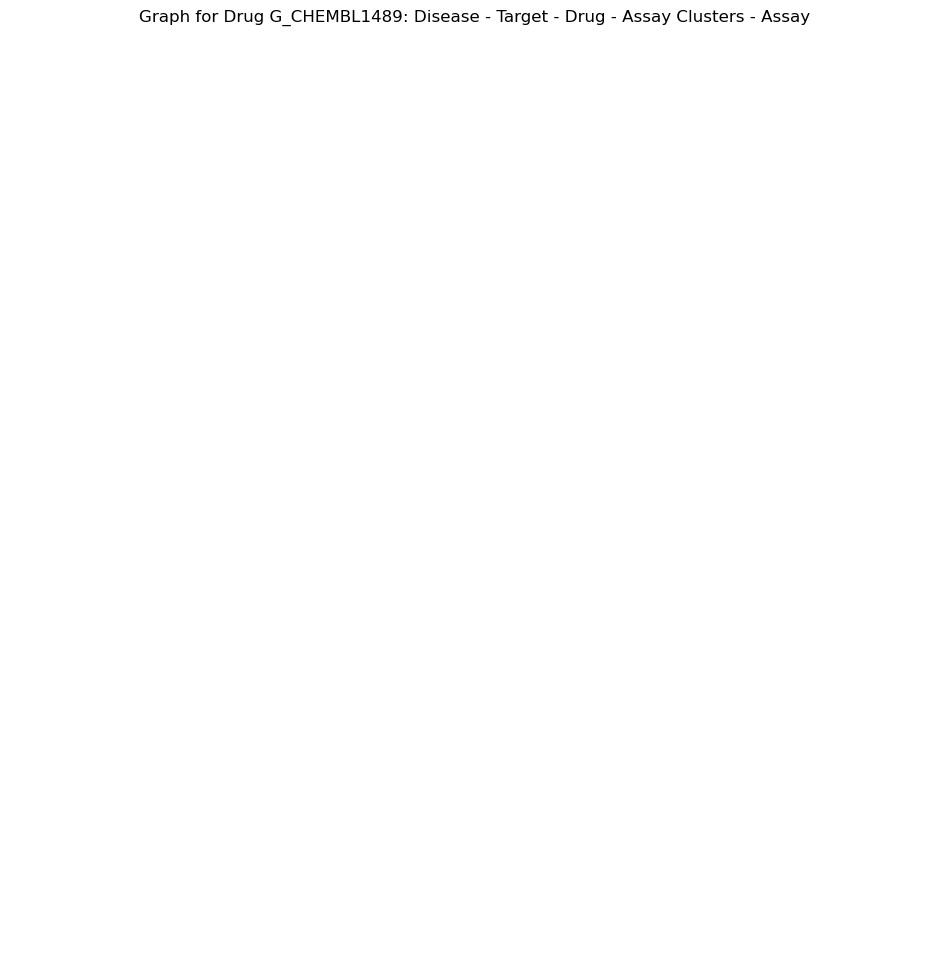

In [22]:
visualise_drug_graph(G_CHEMBL1489)